<a href="https://colab.research.google.com/github/Luan-vP/glider/blob/main/Glider_Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path

repository_path = Path('.').resolve()

!pip install -Uqq -r {repository_path}/requirements.txt -r {repository_path}/requirements-dev.txt

!export PYTHONPATH=$PYTHONPATH:..:../src
!echo $PYTHONPATH

In [2]:
from vehicle import Vehicle
from constants import DEFAULT_STL_FILEPATH
from optimization import measure_drop_test
import simulation
from visualize import render_initial_pixels

import mediapy as media

POPULATION_SIZE = 36

def prep_generation(population: int = 6) -> list[Vehicle]:
    population = [Vehicle(num_points=30) for i in range(population)]

    return population

generation = prep_generation(population=POPULATION_SIZE)
print(generation)

results = [1 for i in range(len(generation))]



[Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle()]


In [3]:
max_distance = max(results)
winning_glider = generation[results.index(max_distance)]

reproduction_ratio = 0.4

# --------   #
epochs = 6
for epoch in range(epochs):
    new_generation = [Vehicle(vertices=winning_glider.vertices) for _ in range(int(POPULATION_SIZE * reproduction_ratio))]
    results = []
    for i in range(0, int(len(generation) - len(new_generation))):
        vehicle = Vehicle(vertices=winning_glider.vertices)
        vehicle.mutate()

        new_generation.append(vehicle)
        result = measure_drop_test(*vehicle.create_glider_from_vertices(), height=800)
        results.append(result)

    generation = new_generation


Max distance:  88.01030720422618


""

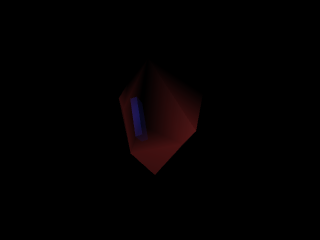

60.96286630623098
Max distance:  88.01030720422618


""

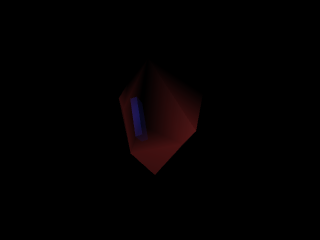

60.96286630623098
Max distance:  88.01030720422618


""

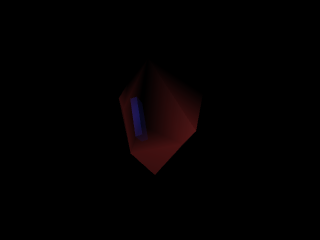

60.96286630623098
Max distance:  88.01030720422618


""

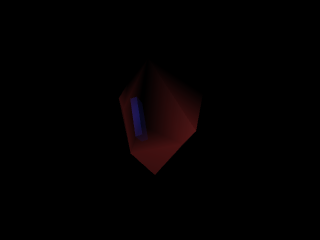

60.96286630623098
Max distance:  88.01030720422618


""

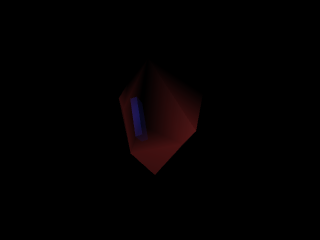

60.96286630623098
Max distance:  88.01030720422618


""

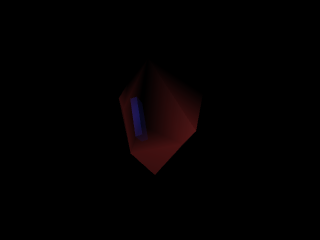

60.96286630623098


In [4]:
epochs = 6


for i in range(epochs):

    max_distance = max(results)
    winning_glider = generation[results.index(max_distance)]

    print("Max distance: ", max_distance)
    orientation = [200, 200, 100]
    world_xml = simulation.wrap_glider(
        *winning_glider.create_glider_from_vertices(
            orientation=orientation,
            scale=4.0,
        )
    )
    media.show_image(render_initial_pixels(world_xml))
    print(result)

In [5]:
import simulation

world_xml = simulation.drop_test_glider(
    *winning_glider.create_glider_from_vertices(),
    height=800
)

with open("/Users/luan/Developer/glider/assets/worlds/world.xml", "w") as f:
    f.write(world_xml)